<a href="https://colab.research.google.com/github/henriquebap/Avocado-Prices-EDA-Model-Traning/blob/main/Avocado_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Objective
- Avocados have become an increasingly popular fruit in recent years, celebrated for their nutritional benefits and versatility in various culinary applications. However, fluctuations in avocado prices have intrigued both consumers and industry professionals. The dataset provided by [Kaggle](https://www.kaggle.com/datasets/neuromusic/avocado-prices) offers a comprehensive overview of avocado prices and volumes across multiple regions in the United States over several years.

- Inspired by insights from [Bevspot](http://www.hassavocadoboard.com/retail/volume-and-price-data)'s article, which explores why avocado prices spike in late August, this dataset offers a valuable resource for understanding the underlying patterns and trends in avocado pricing.

## Objective
- The primary objective of this analysis is to identify and understand the factors influencing avocado prices over time. By leveraging visual and statistical analytical methods, we aim to:

### Exploratory Data Analysis (EDA):

- Explore Monthly and Yearly Trends: Identify the seasonal patterns and yearly trends in avocado prices.
- Correlation Analysis: Determine the relationship between different variables, such as volume sold and types of bags, and their impact on average pricing.
- Price Differentiation: Compare and contrast the pricing trends between conventional and organic avocados.
- Regional Analysis: Analyze how avocado prices vary across different regions in the United States.

### Machine Learning Model:

- **Objective**: Develop a predictive model to forecast future avocado prices based on historical data and various influencing factors.


---


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

  - Hass avocados are prized for their creamy texture and rich, nutty flavour

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Data Features
---

Columns in the dataset:

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225` - Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold


In [ ]:
data = ('/content/avocado.csv')

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df.isnull().sum()

,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


In the dataset, there are 14 columns with 18249 observations.

Also, there are no null values in this dataset.

Let's drop the Unnamed Column

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Verifying unique values in the PLU columns to understand what they represent
plu_summary = df[['4046', '4225', '4770']].describe()

# Display the unique regions and types to get an overview
unique_regions = df['region'].unique()
unique_types = df['type'].unique()

plu_summary, unique_regions, unique_types


(               4046          4225          4770
 count  1.824900e+04  1.824900e+04  1.824900e+04
 mean   2.930084e+05  2.951546e+05  2.283974e+04
 std    1.264989e+06  1.204120e+06  1.074641e+05
 min    0.000000e+00  0.000000e+00  0.000000e+00
 25%    8.540700e+02  3.008780e+03  0.000000e+00
 50%    8.645300e+03  2.906102e+04  1.849900e+02
 75%    1.110202e+05  1.502069e+05  6.243420e+03
 max    2.274362e+07  2.047057e+07  2.546439e+06,
 array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       

### Data Set Exploration

First, let's understand the distribution and relationship of the numerical columns with some graphs.

1. **Average Price** over time
2. **Total Volume**, **4046**, **4225**, **4770** over time
3. **Total Bags** and **types** of bags over time
4. Count of observations per **type** (conventional or organic)
5. Count of observations per **year**
6. Count of observations per **region**

Converting the '`Date`' column to datetime format

Color **Pallets**

In [ ]:
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']


In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-79-62459d6b9b24>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date', y='AveragePrice', data=df, palette=olive_grad)


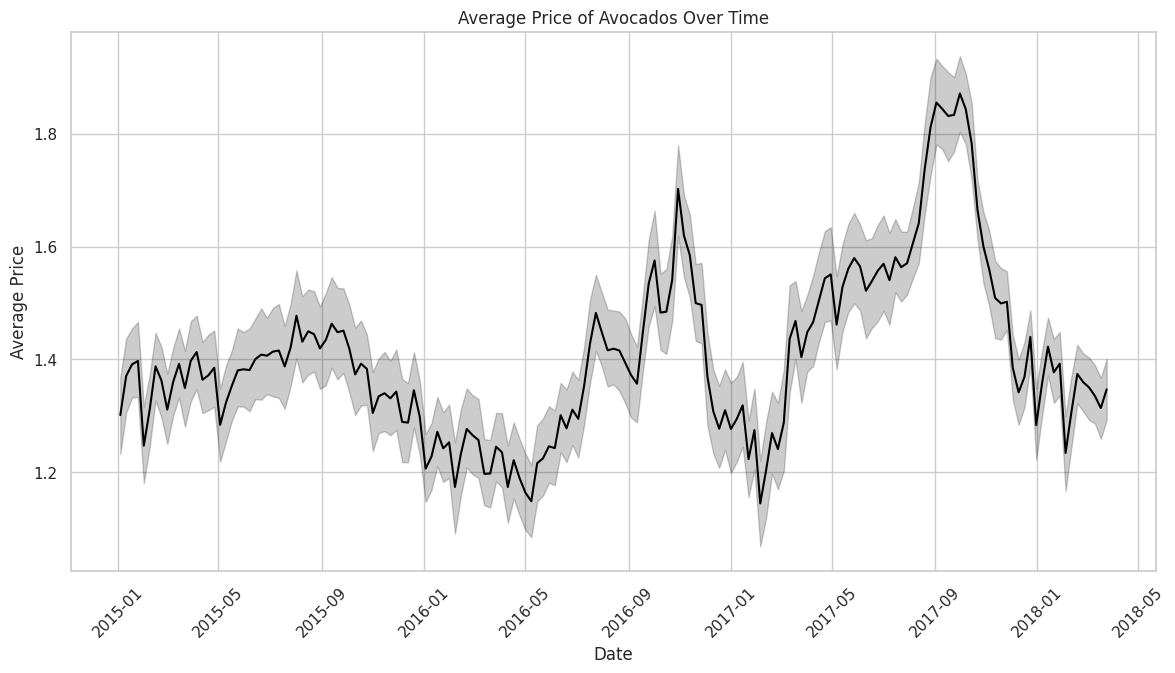

In [ ]:
# Setting the aesthetics for the plots
sns.set_palette(sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=False))


# 1. Average Price over Time
plt.figure(figsize=(14, 7))

sns.lineplot(x='Date', y='AveragePrice', data=df, palette=olive_grad)

plt.title('Average Price of Avocados Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Peak **average** price observed in September 2017.

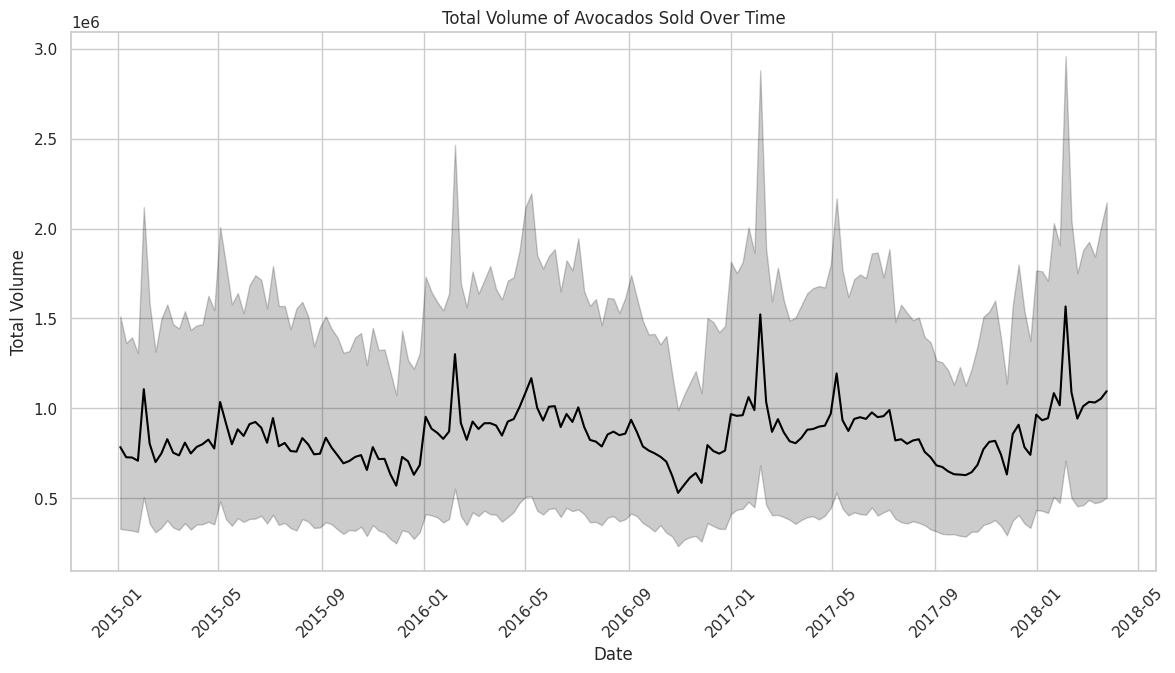

In [ ]:
# 2. Total Volume over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Total Volume', data=df)
plt.title('Total Volume of Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.show()

Consistent price peaks observed at the beginning of each year, notably in 2016, 2017, and 2018

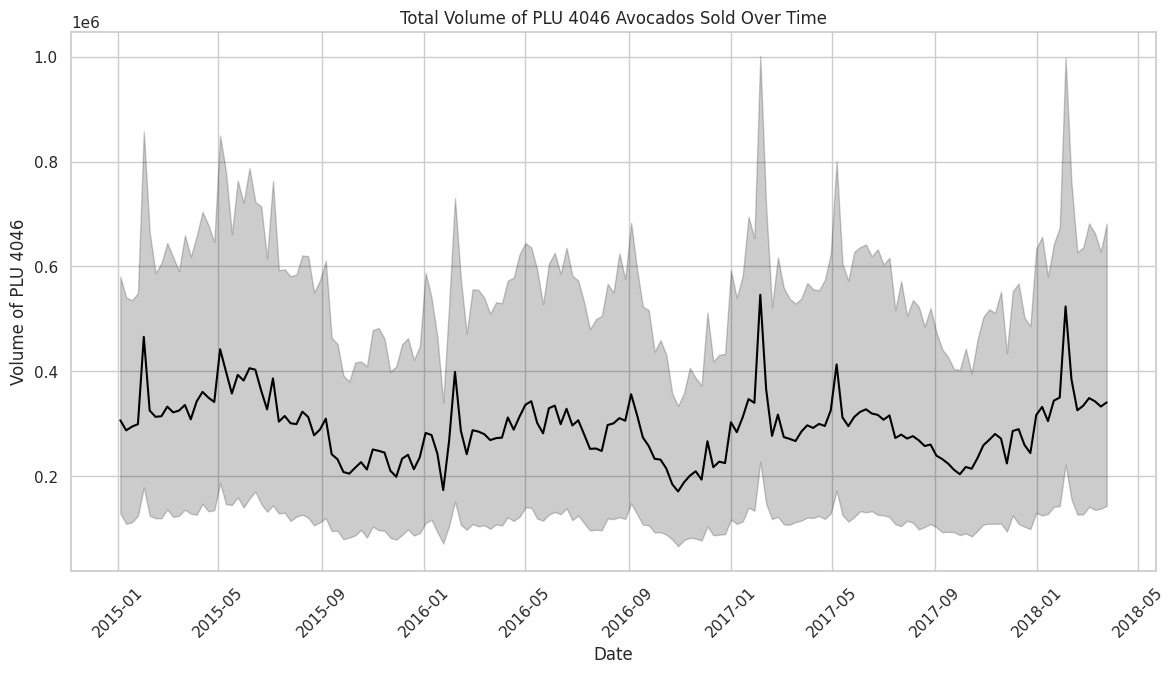

In [ ]:
# 3. Distribution of 4046 Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='4046', data=df)
plt.title('Total Volume of PLU 4046 Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of PLU 4046')
plt.xticks(rotation=45)
plt.show()

Same consistent price peaks observed and growing.

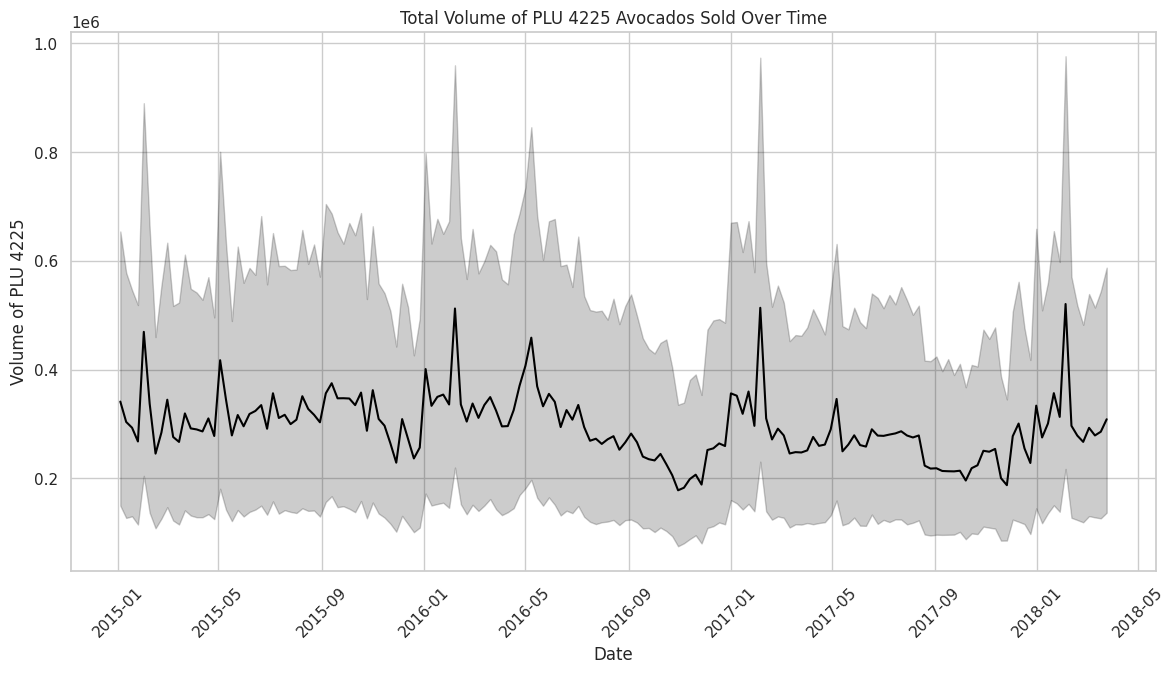

In [ ]:
# 4. Distribution of 4225 Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='4225', data=df)
plt.title('Total Volume of PLU 4225 Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of PLU 4225')
plt.xticks(rotation=45)
plt.show()

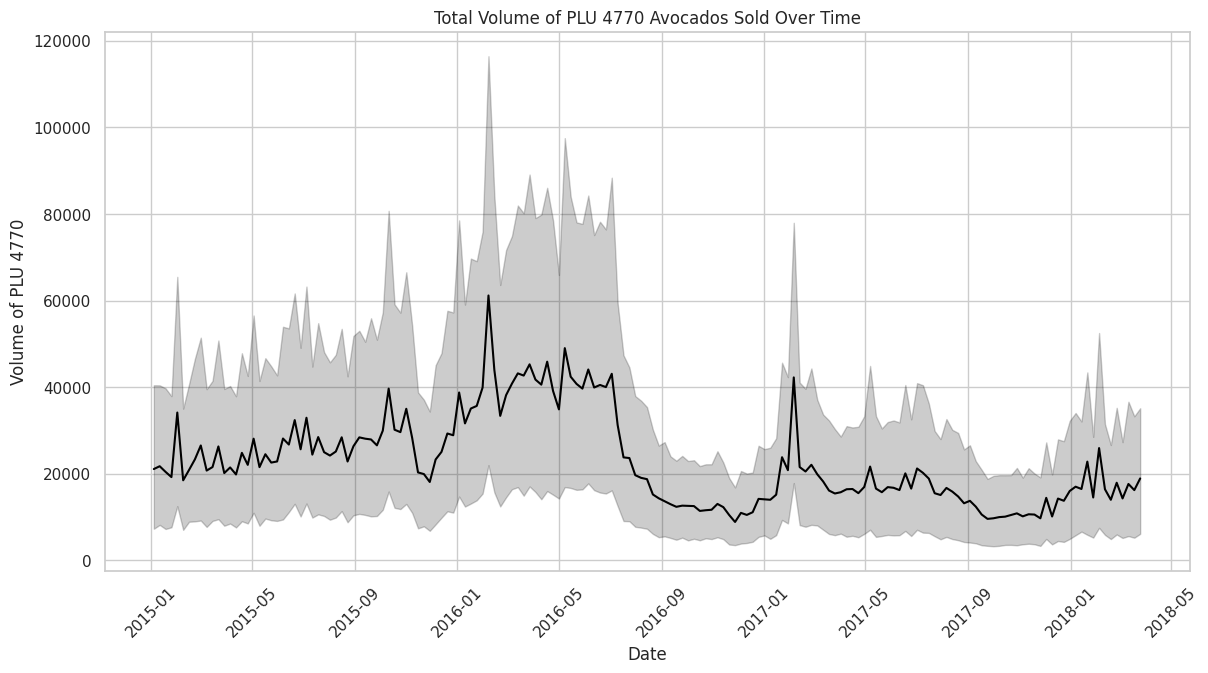

In [ ]:
# 5. Distribution of 4770 Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='4770', data=df)
plt.title('Total Volume of PLU 4770 Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of PLU 4770')
plt.xticks(rotation=45)
plt.show()

This type shows a high peak at the beginning of the year, but unlike the others, it experienced the steepest decline from 2016 to January 2017, with significantly slower growth thereafter.

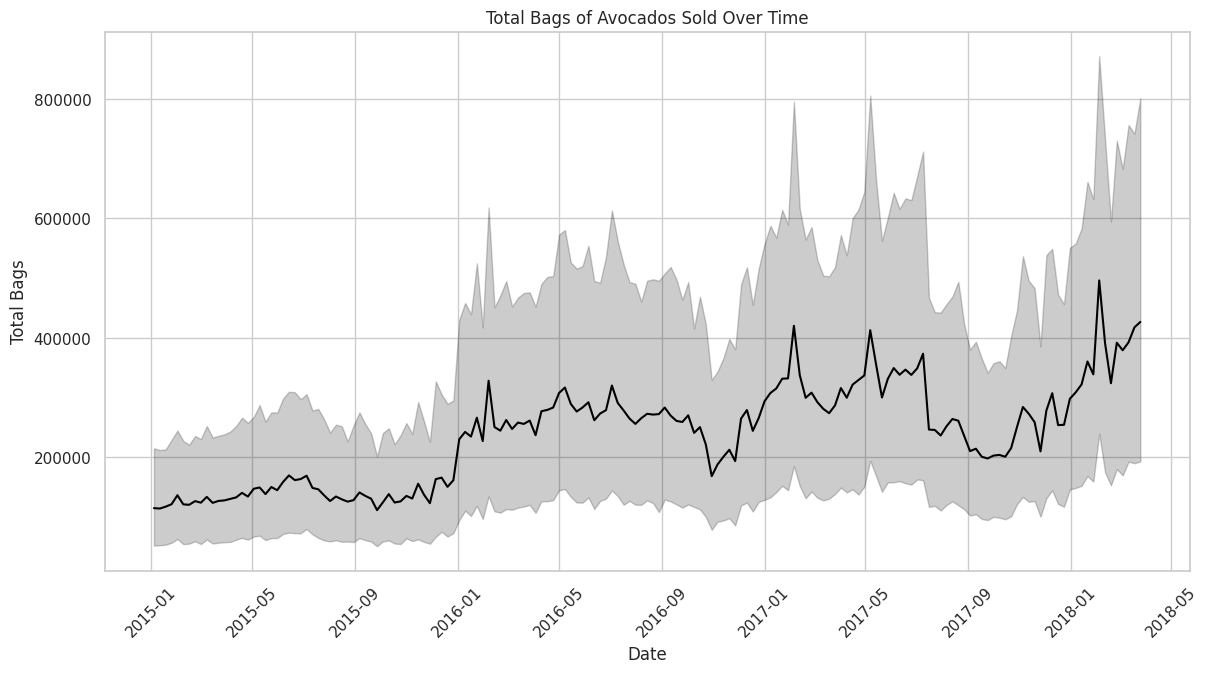

In [ ]:
# 6. Total Bags over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Total Bags', data=df)
plt.title('Total Bags of Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bags')
plt.xticks(rotation=45)
plt.show()

The total number of bags sold has consistently increased over the months and years.

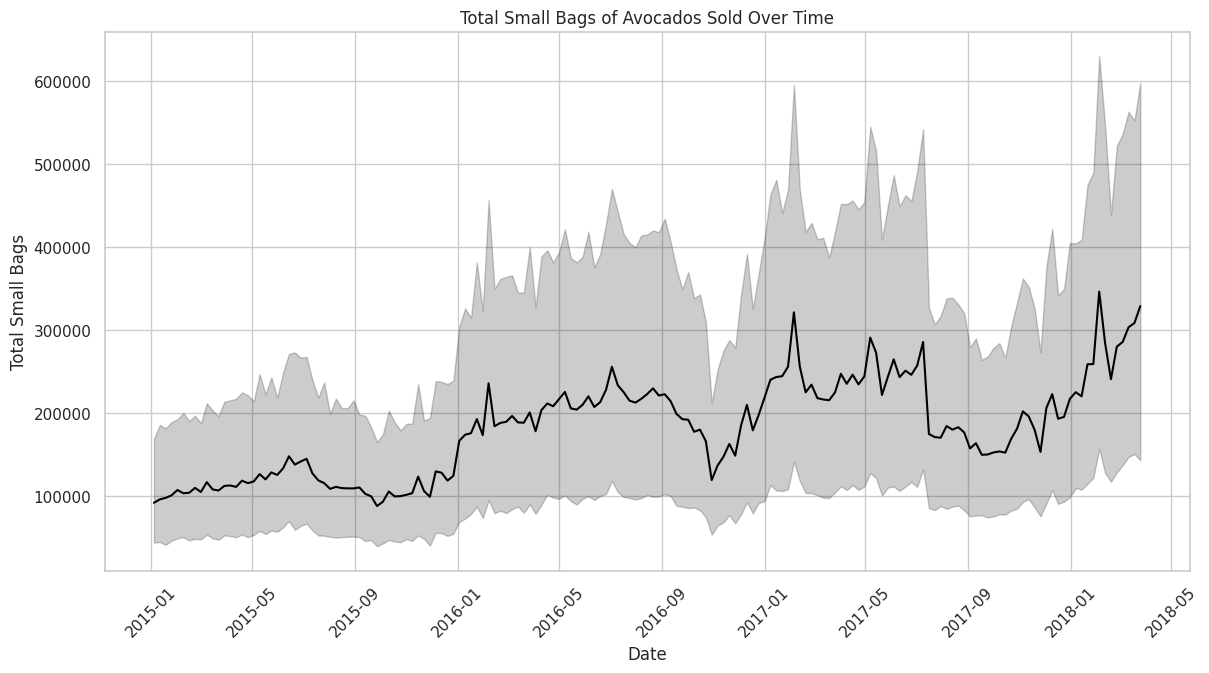

In [ ]:
# 7. Distribution of Small Bags Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Small Bags', data=df)
plt.title('Total Small Bags of Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Small Bags')
plt.xticks(rotation=45)
plt.show()

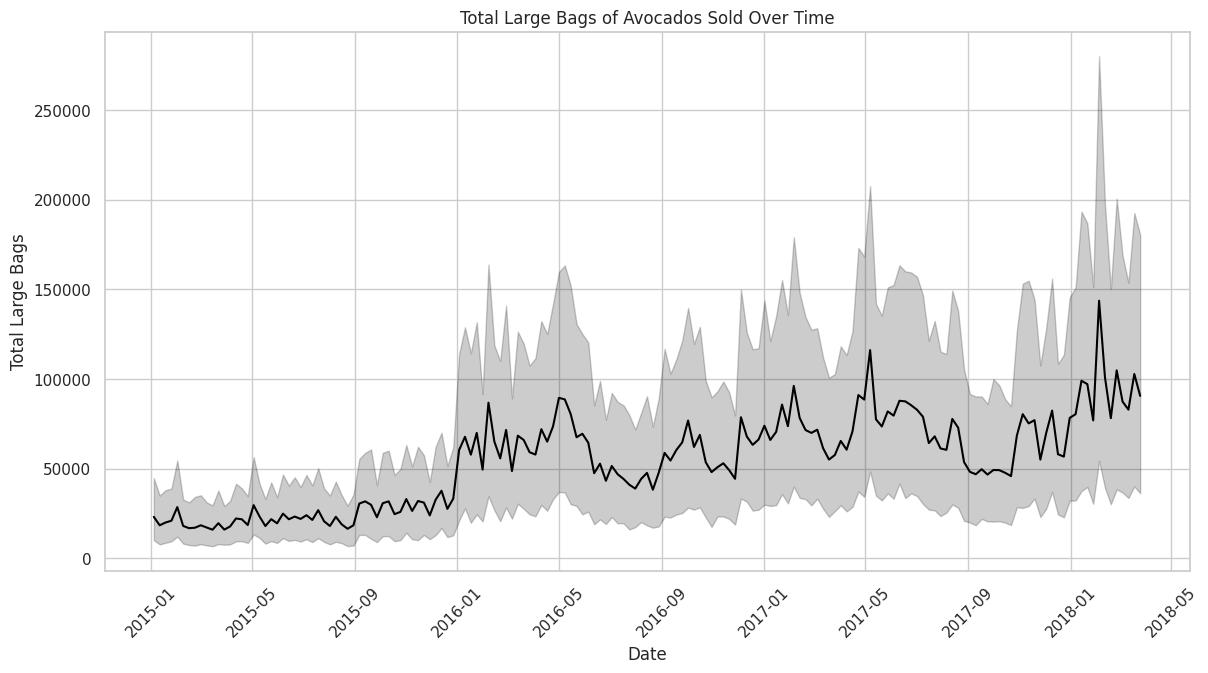

In [ ]:
# 8. Distribution of Large Bags Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Large Bags', data=df)
plt.title('Total Large Bags of Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Large Bags')
plt.xticks(rotation=45)
plt.show()

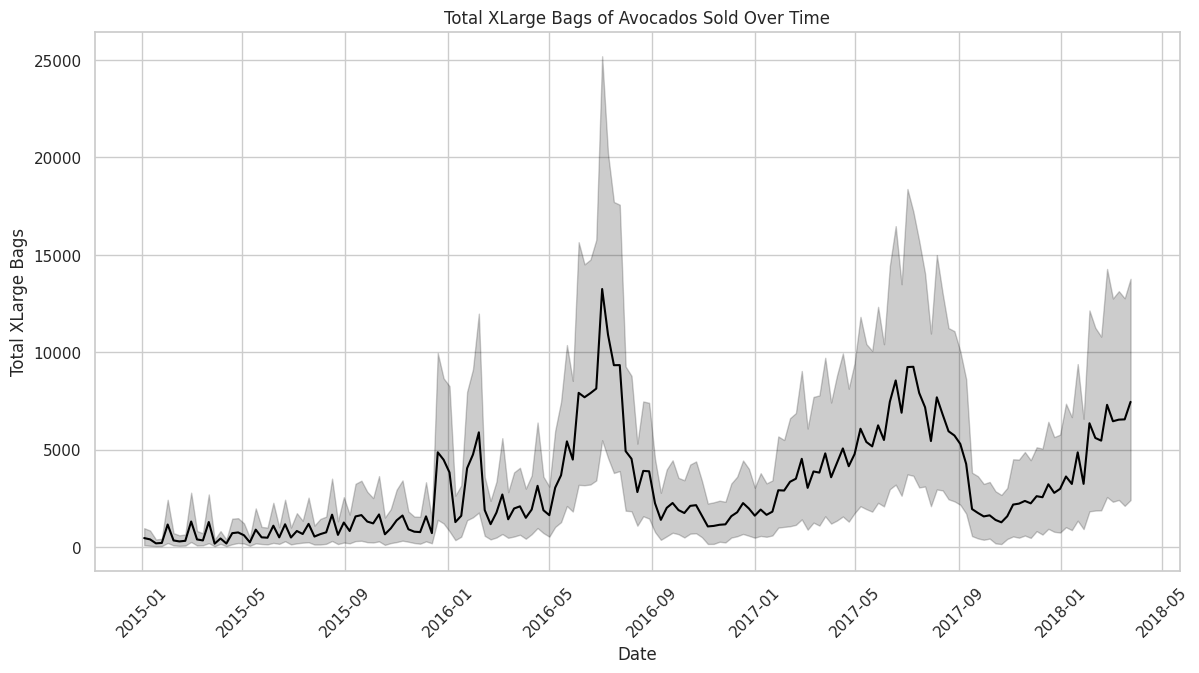

In [ ]:
# 9. Distribution of XLarge Bags Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='XLarge Bags', data=df)
plt.title('Total XLarge Bags of Avocados Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total XLarge Bags')
plt.xticks(rotation=45)
plt.show()

### Count plots for categorical columns


<ipython-input-35-e1c1122f3bb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df,palette=olive_grad)
<ipython-input-35-e1c1122f3bb7>:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='type', data=df,palette=olive_grad)


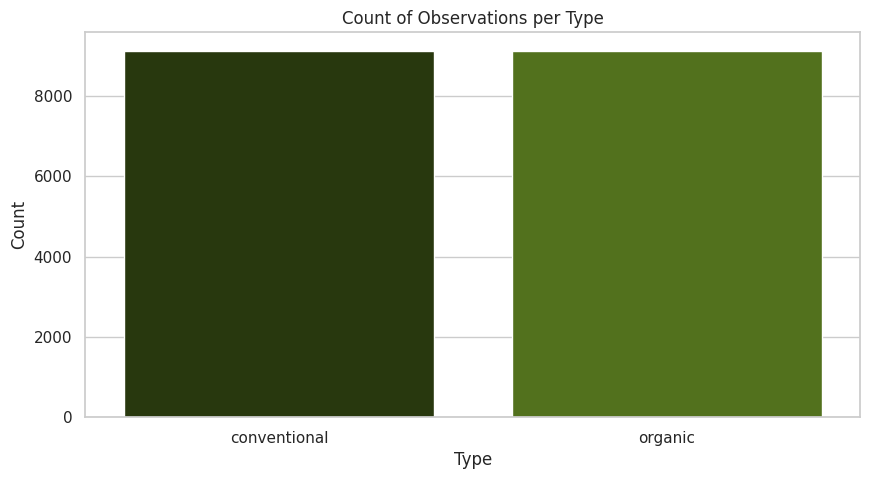

In [ ]:
# 1. Count of observations per type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df,palette=olive_grad)
plt.title('Count of Observations per Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The dataset contains an equal number of observations for Hass avocados.

<ipython-input-38-9e4116b5ad1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette=olive_grad, legend=False)
<ipython-input-38-9e4116b5ad1d>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='year', data=df, palette=olive_grad, legend=False)


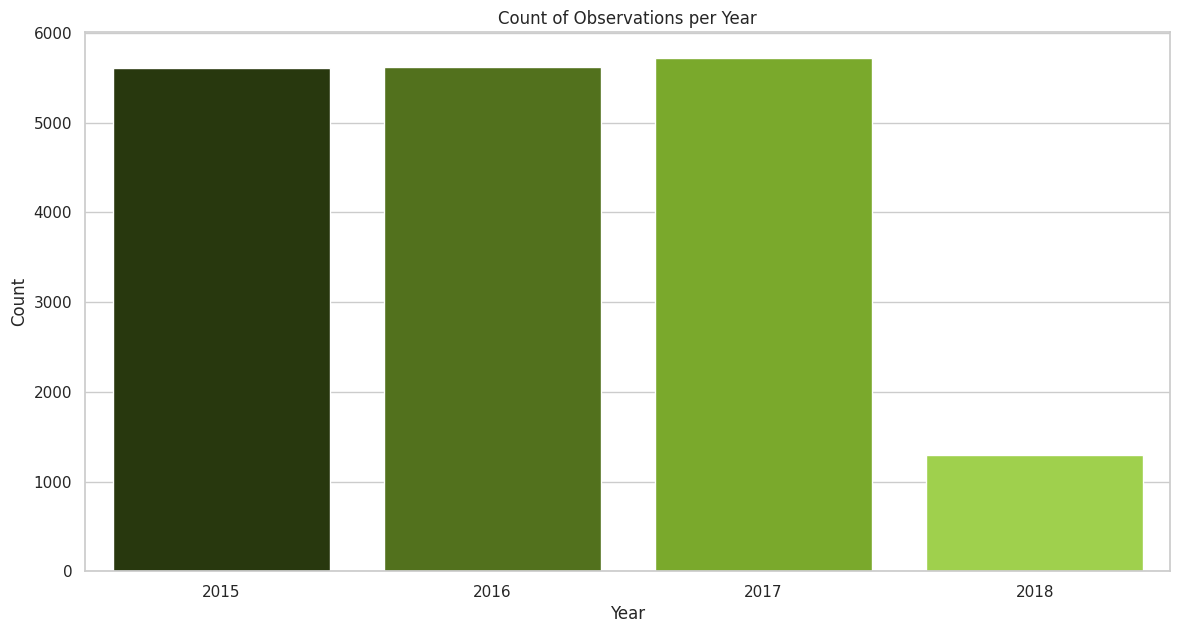

In [ ]:
# 2. Count of observations per year
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=df, palette=olive_grad)
plt.title('Count of Observations per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We have an equal count of observations per year, except for 2018, where we have only a few data points.

<ipython-input-37-99cde57faecc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='region', data=df, order=df['region'].value_counts().index, palette=olive_grad)
<ipython-input-37-99cde57faecc>:3: UserWarning: 
The palette list has fewer values (5) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='region', data=df, order=df['region'].value_counts().index, palette=olive_grad)


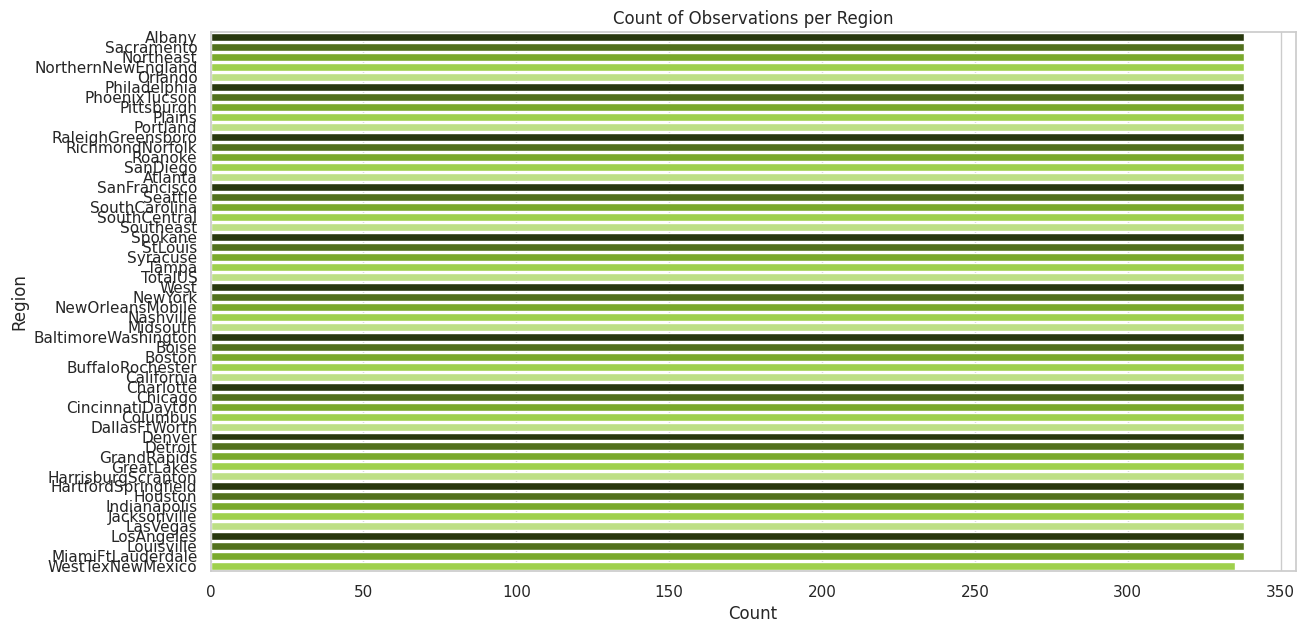

In [ ]:
#3. Count of observations per region
plt.figure(figsize=(14, 7))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index, palette=olive_grad)
plt.title('Count of Observations per Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

The number of avocados from various regions are equally distributed

## EDA

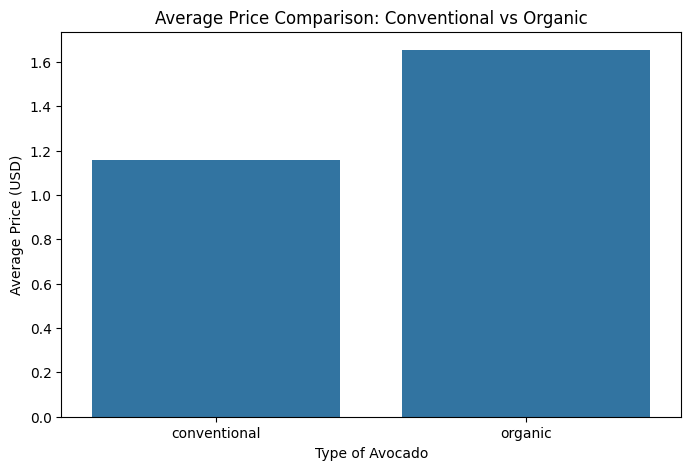

,AveragePrice
type,
conventional,1.158040
organic,1.653999


In [ ]:
# Compare the average price between conventional and organic avocados
avg_price_comparison = df.groupby('type')['AveragePrice'].mean()

# Plotting the comparison of average prices
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_comparison.index, y=avg_price_comparison.values)
plt.title('Average Price Comparison: Conventional vs Organic')
plt.ylabel('Average Price (USD)')
plt.xlabel('Type of Avocado')
plt.show()

avg_price_comparison


 **Comparison of Average Price Between Avocado Types**:
  - Organic avocados generally have a higher average price compared to conventional avocados. This aligns with market expectations, as organic products usually command a premium due to the perceived benefits and costlier cultivation methods.
- While the number of observations is generally consistent across the years, there's a $ 0.49 difference in average prices:
 conventional avocados average 1.16, while organic avocados average 1.65.

<ipython-input-41-db1d07fcc7f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_avg_price.index, x=region_avg_price.values, palette=color_mix)
<ipython-input-41-db1d07fcc7f4>:6: UserWarning: 
The palette list has fewer values (5) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=region_avg_price.index, x=region_avg_price.values, palette=color_mix)


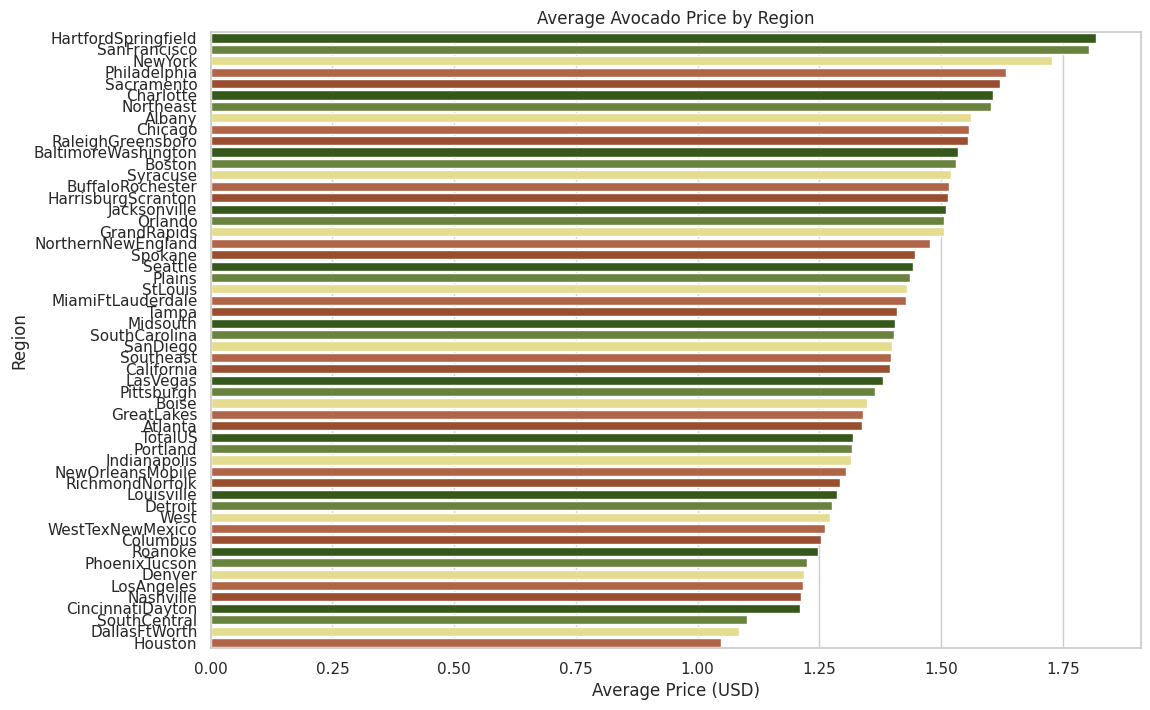

region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Philadelphia           1.632130
Sacramento             1.621568
Charlotte              1.606036
Northeast              1.601923
Albany                 1.561036
Chicago                1.556775
RaleighGreensboro      1.555118
Name: AveragePrice, dtype: float64


In [ ]:
# Regional analysis: Calculate the average price of avocados across different regions
region_avg_price = df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

# Plotting the average price across regions
plt.figure(figsize=(12, 8))
sns.barplot(y=region_avg_price.index, x=region_avg_price.values, palette=color_mix)
plt.title('Average Avocado Price by Region')
plt.xlabel('Average Price (USD)')
plt.ylabel('Region')
plt.show()

print(region_avg_price.head(10))

- **Comparison of Average Price Across Different Regions**:
    - There is significant regional variation in the average price of avocados. Some regions consistently show higher prices, possibly due to differences in supply and demand, transportation costs, and regional preferences.

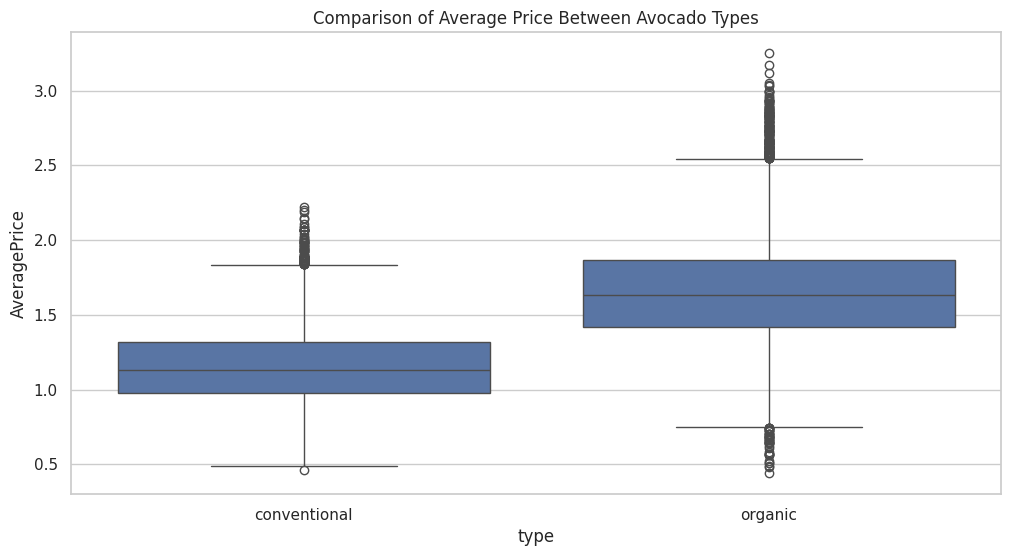

In [ ]:
# Set visualization style
sns.set(style="whitegrid")

# Compare average price between the two types of avocados
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Comparison of Average Price Between Avocado Types')
plt.show()

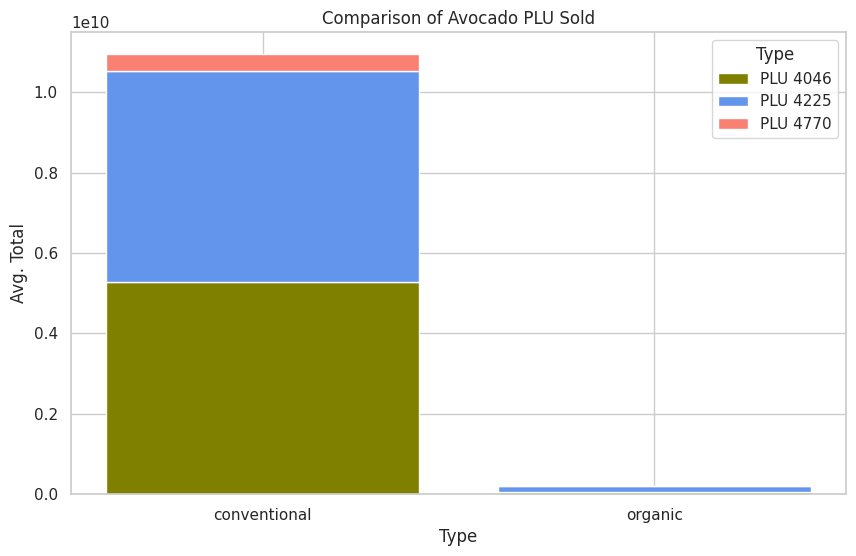

In [ ]:
# Aggregate the total sales for each PLU type by 'type' (conventional or organic)
agg_data = df.groupby('type')[['4046', '4225', '4770']].sum().reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Set the positions and width for the bars
bar_width = 0.6

# Create the bar chart
plt.bar(agg_data['type'], agg_data['4046'], label='PLU 4046', color='olive')
plt.bar(agg_data['type'], agg_data['4225'], bottom=agg_data['4046'], label='PLU 4225', color='cornflowerblue')
plt.bar(agg_data['type'], agg_data['4770'], bottom=agg_data['4046'] + agg_data['4225'], label='PLU 4770', color='salmon')

# Adding labels and title
plt.xlabel('Type')
plt.ylabel('Avg. Total')
plt.title('Comparison of Avocado PLU Sold')
plt.legend(title='Type')

# Display the plot
plt.show()

Based on the graph, it is evident that for conventional avocados, the quantities sold for PLU 4046 and PLU 4225 are nearly identical, with PLU 4770 showing a significantly smaller quantity sold compared to the other PLUs. In contrast, for organic avocados, the highest quantity is observed for PLU 4225, followed by PLU 4046

<ipython-input-45-526619809581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='AveragePrice', data=df, palette=color_mix)
<ipython-input-45-526619809581>:3: UserWarning: 
The palette list has fewer values (5) than needed (54) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='region', y='AveragePrice', data=df, palette=color_mix)


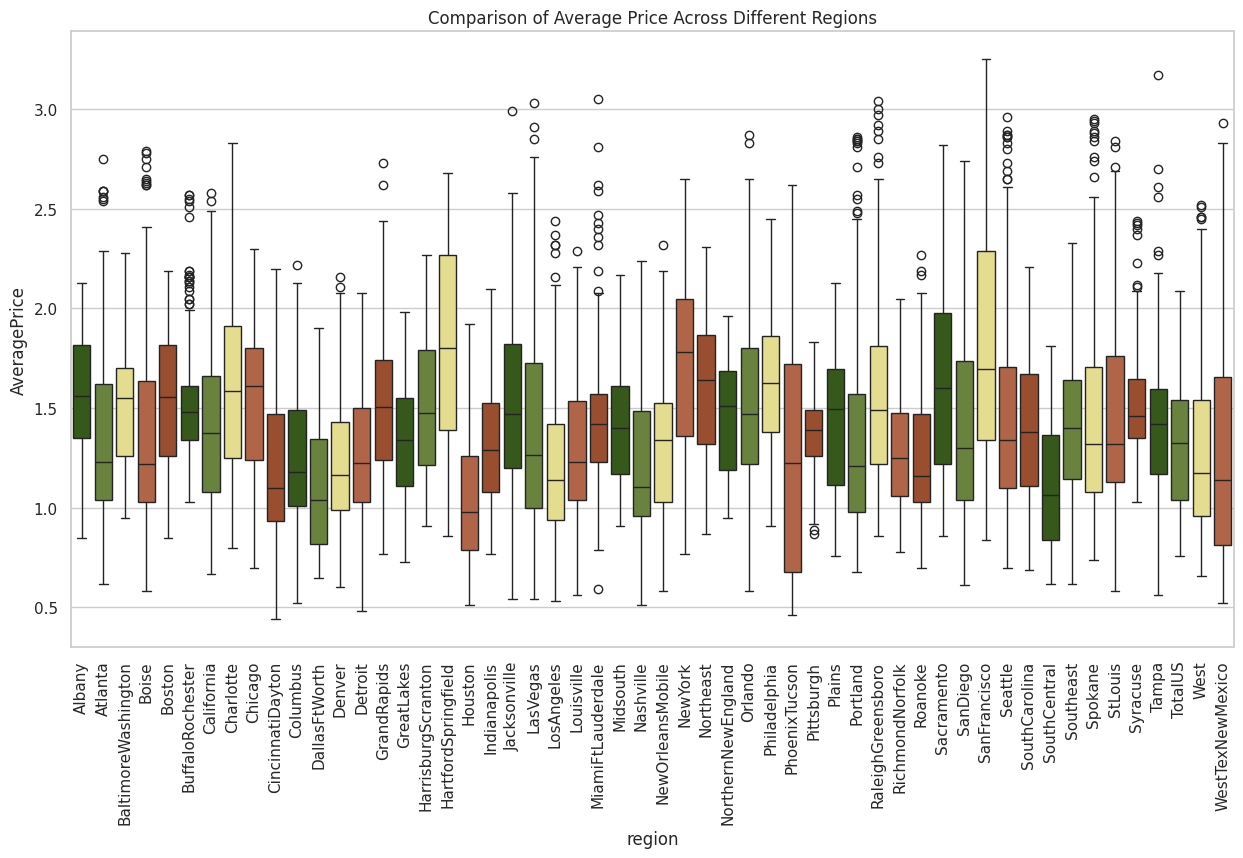

In [ ]:
# Analyzing differences across regions
plt.figure(figsize=(15, 8))
sns.boxplot(x='region', y='AveragePrice', data=df, palette=color_mix)
plt.xticks(rotation=90)
plt.title('Comparison of Average Price Across Different Regions')
plt.show()


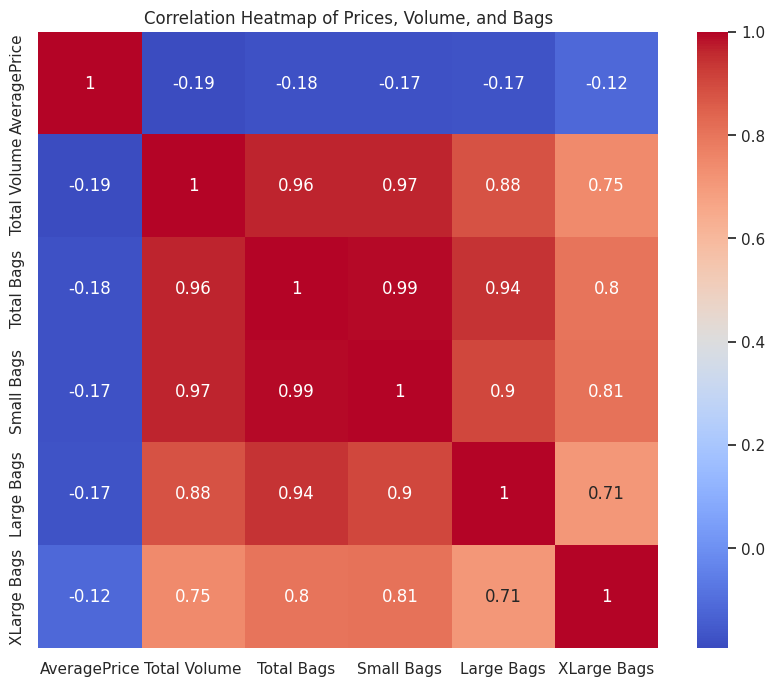

In [ ]:
# Correlation between prices, total volume, and bags
plt.figure(figsize=(10, 8))
sns.heatmap(df[['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Prices, Volume, and Bags')
plt.show()

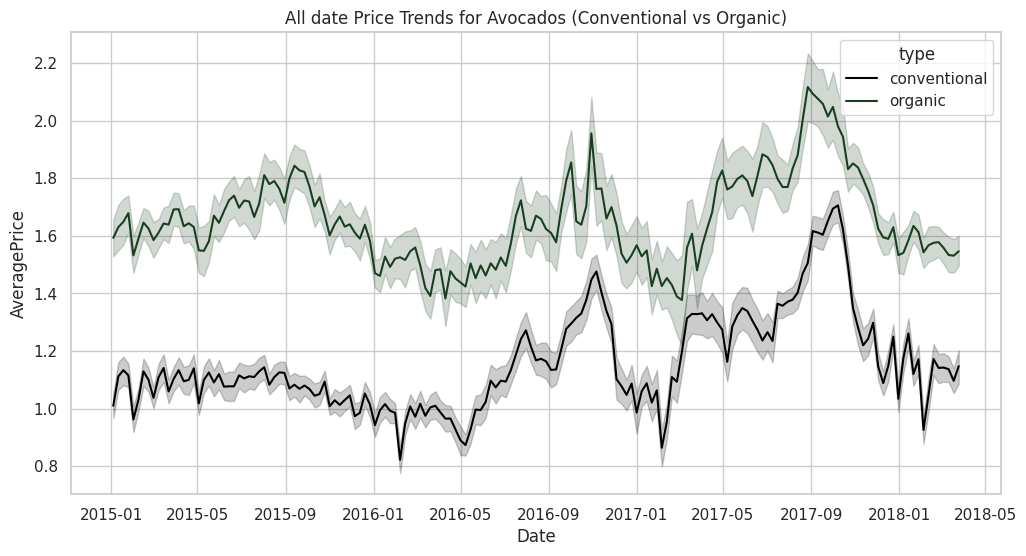

In [ ]:
# Sales and price trends by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', hue='type', data=df)
plt.title('All date Price Trends for Avocados (Conventional vs Organic)')
plt.show()


This website explains why avocado prices increase in late August: https://bevspot.com/blog/why-do-avocados-get-so-expensive-in-late-august/.

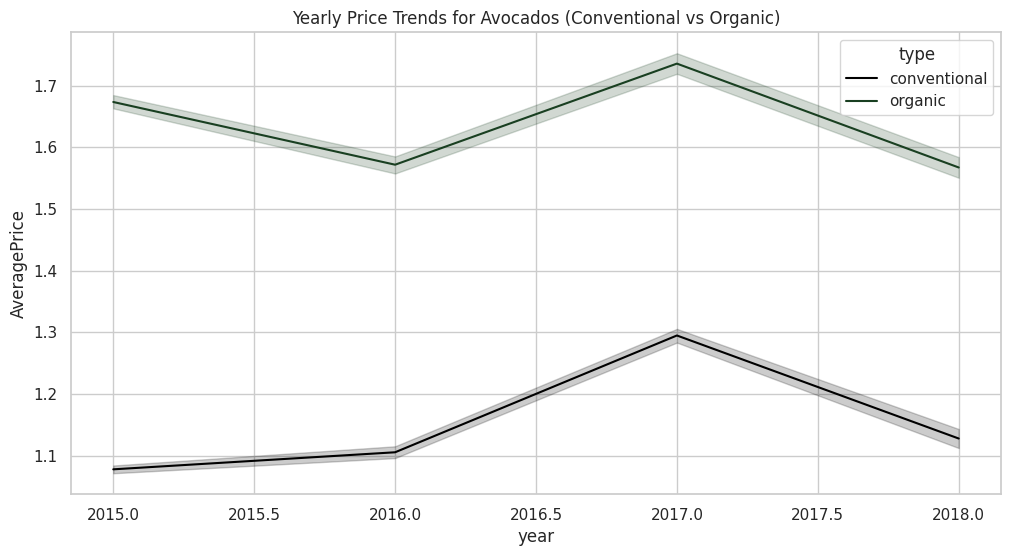

In [ ]:
# Sales and price trends by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='AveragePrice', hue='type', data=df)
plt.title('Yearly Price Trends for Avocados (Conventional vs Organic)')
plt.show()

- **Yearly Price Trends for Avocados (Conventional vs Organic)**:
    - Both conventional and organic avocados exhibit a general increasing trend in prices over the years. Organic avocados remain consistently more expensive than conventional ones throughout the years.

In [ ]:
average_price_by_month_year = df.groupby(['type', 'year', 'Month'])['AveragePrice'].mean().reset_index()

<Figure size 1400x800 with 0 Axes>

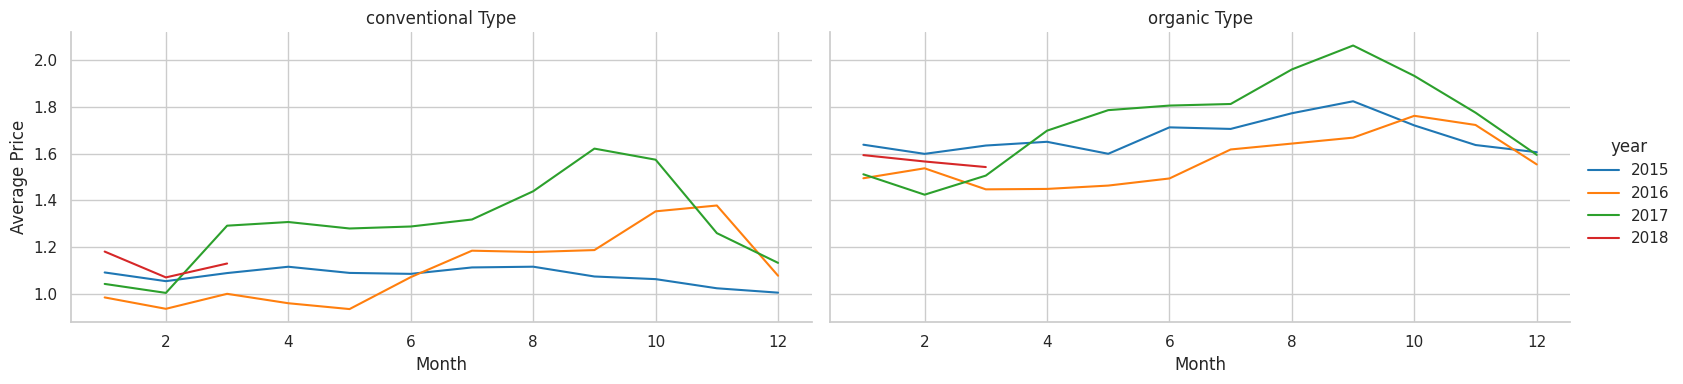

In [ ]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plotting the differences across years and months (facet by type)
rel_plot = sns.relplot(x='Month', y='AveragePrice', hue='year', col='type', kind='line', data=average_price_by_month_year, palette="tab10", col_wrap=2, height=4, aspect=2)
rel_plot.set_axis_labels("Month", "Average Price")
rel_plot.set_titles("{col_name} Type")

plt.show()

- **Conventional Type:** There is a general increase in average prices towards the latter part of the year, especially in 2017.
- **Organic Type:** Organic prices generally trend higher than conventional, with noticeable peaks around mid-year in 2017 and consistent increases for other years.
- The graph indicates a noticeable upward trend in prices from August to October.

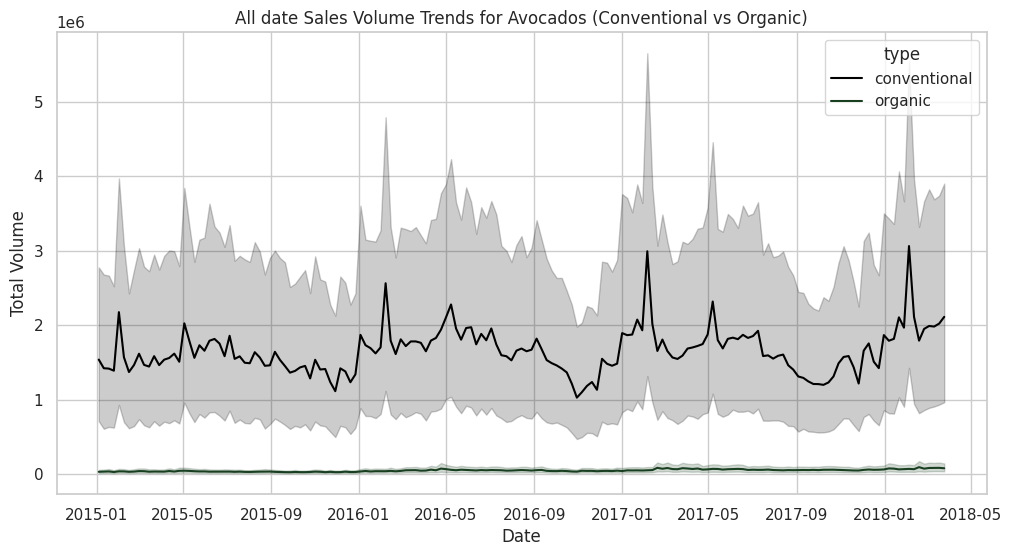

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Volume', hue='type', data=df)
plt.title('All date Sales Volume Trends for Avocados (Conventional vs Organic)')
plt.show()

- As previously mentioned in previous EDA, conventional avocado has highest sales compared to organic avocados
- Further analysis reveals an upward trend in conventional avocado sales from the end of the year through February of the following year. The peak in sales for conventional avocados occurred in February 2018, while the lowest sales were recorded in November 2016.
- However, there is no significant increase or decrease in organic avocado sales from 2015 until beginning of 2018.

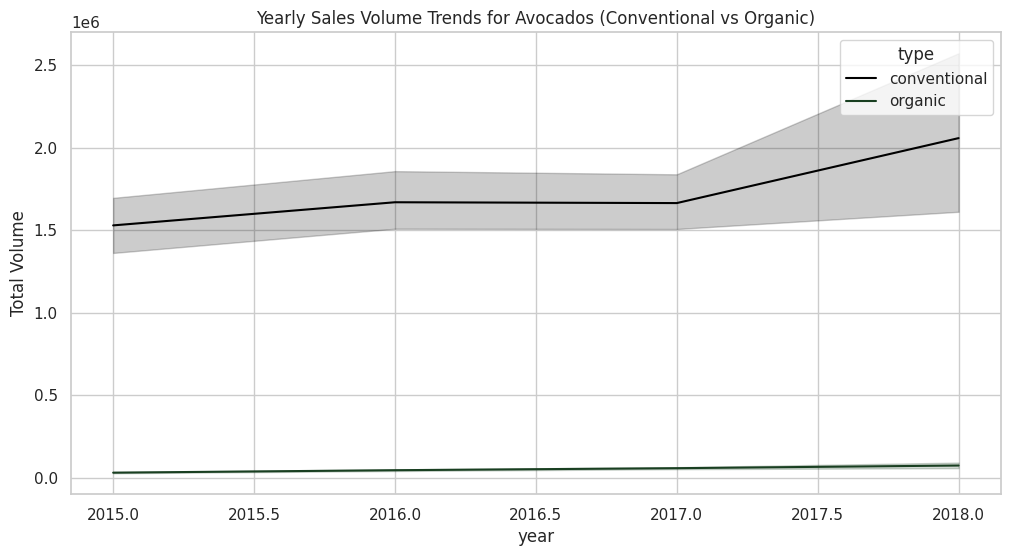

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Total Volume', hue='type', data=df)
plt.title('Yearly Sales Volume Trends for Avocados (Conventional vs Organic)')
plt.show()

- **Yearly Sales Volume Trends for Avocados (Conventional vs Organic)**:
    - The sales volume of conventional avocados shows some fluctuations but remains generally higher than that of organic avocados. Sales of organic avocados are rising slowly over the years, which could indicate growing consumer preference for organic products.
- **Comparison of Total Volume Sold Between Avocado Types**:
    - Conventional avocados tend to be sold in higher total volumes compared to organic avocados. This observation could be due to conventional avocados being more widely available and potentially having a broader consumer base.

In [ ]:
# Pivot the data for the heatmap visualization
pivot_price = df.pivot_table(values='AveragePrice', index='region', columns='year', aggfunc='mean')
pivot_volume = df.pivot_table(values='Total Volume', index='region', columns='year', aggfunc='sum')

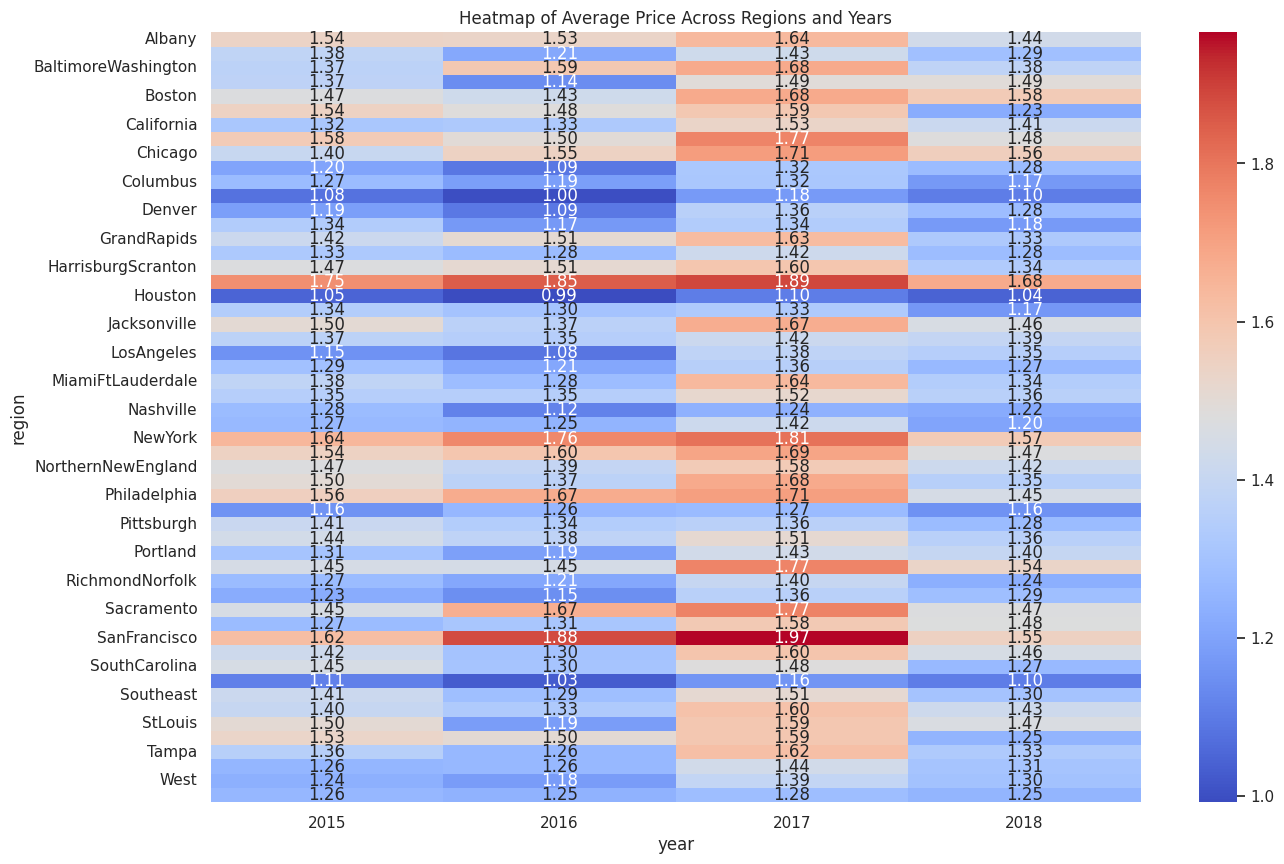

In [ ]:
# Heatmap for average price across regions and years
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_price, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Average Price Across Regions and Years')
plt.show()

- **Heatmap of Average Price Across Regions and Years**:
    - Certain regions (like San Francisco, New York, and Los Angeles) consistently display higher average prices across multiple years. This might be attributed to higher demand or cost of living in these urban areas.
    - There is an observable trend of rising prices over the years in many regions, reflecting overall market trends.

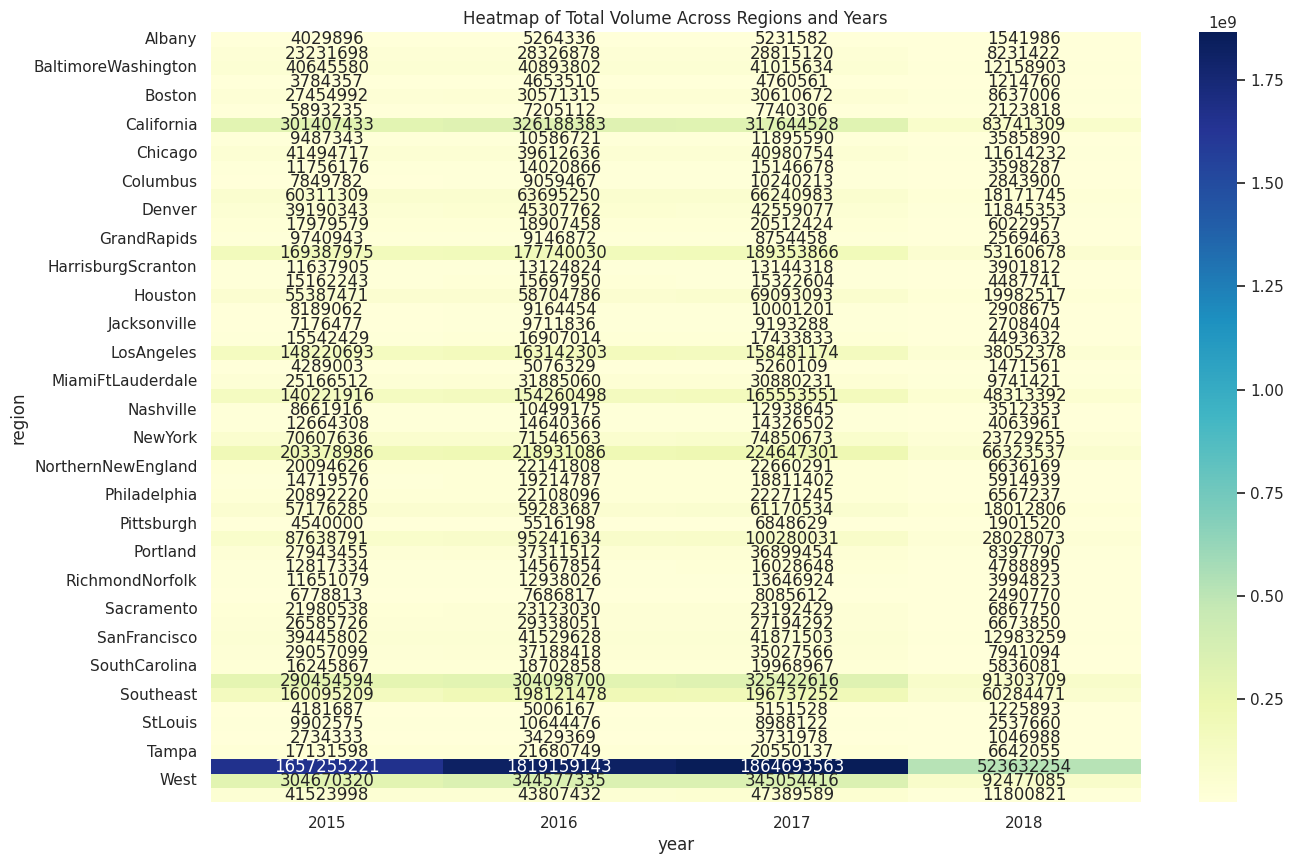

In [ ]:
# Heatmap for total volume across regions and years
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_volume, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Heatmap of Total Volume Across Regions and Years')
plt.show()

- **Heatmap of Total Volume Across Regions and Years**:
    - Regions such as Los Angeles, New York, and California exhibit high sales volumes, indicating significant demand in these areas.
    - The total volume sold seems to fluctuate more compared to the steady increase in average prices across the years.

## EDA conclusion
Upon exploring the dataset, we observed some intriguing trends regarding the sales and pricing of conventional and organic avocados:
1. Pricing and Sales Trends:

- **Conventional Avocados:** These avocados are generally priced lower and show substantial sales volume. The affordability of conventional avocados likely drives their high consumer preference.
- **Organic Avocados:** Although organic avocados are sold at a premium price, their sales volumes are notably lower. The significant price difference suggests that consumers might opt for conventional avocados due to cost-effectiveness.

2. Temporal Trends:

- **Sales Peaks:** Noteworthy spikes in sales for both avocado types are observed during February 2016, May 2016, and February 2017. Interestingly, these periods coincide with the lowest prices for conventional avocados, suggesting that reduced prices boost sales significantly.
- **Best Selling Periods:** For conventional avocados, sales tend to peak towards the end of the year and in early months, indicating a favorable selling period from late December through February.

3. Price Interdependencies:
- **Organic vs. Conventional Prices:** Organic avocado prices appear to follow the pricing trends of conventional avocados. However, this mirroring effect doesn't significantly alter the overall sales, which remain fairly consistent month over month.

4. Yearly Price Comparison:

- 2017 Insights: The year 2017 stands out as having the highest average prices for both conventional and organic avocados, surpassing both previous and subsequent years.

5. Regional Sales Dynamics:

- **Top Sales Regions:** Regions like the West and California lead in avocado sales for both types. They are closely followed by South Central and North East regions.
- **Highest Prices:** Springfield, New York, and San Francisco are highlighted as regions with the highest average prices for both types of avocados.

6. PLU and Bag Type Analysis:
- **PLU Sales:** Avocados categorized under PLU 4046 and 4225 exhibit higher average sales compared to those under PLU 4770.
- **Bag Sales:** Small avocado bags dominate the sales charts, outperforming other bag types in terms of average numbers sold.

7. Volume and Bag Relationship:

- Correlation Insights: A noticeable positive correlation exists between the total volume of avocados sold and the number of avocado bags available. This correlation is also visually confirmed through scatter plots showcasing heteroscedasticity, as well as high values in the correlation map.

---

### Conclusion

- in conclusion, the analysis demonstrates that prices sensitivity plays a crucial role in consumer purchasing decisions, particulary favoring conventional avocados. Seasonal trends, regional preferences, and bag types further influence overall sales dynamics. For marketers and producers, these insights could be privotal in startegizing pricing, marketing, and sales efforts to maximize profitability.

### Dataset Pre-processing



In [ ]:
# --- Change `Date` Format to 'datetime' ---
df.Date = pd.to_datetime(df.Date)

# --- Extracting Month Number from `Date`  ---
df['month'] = pd.DatetimeIndex(df['Date']).month

## Machine Learning Model

- We'll create a machine learning model to forecast and predict the prices of Hass avocados. Specifically, we'll use four different algorithms:


### Model Selection:

1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **XGBoost Regressor**

### Steps
1. **Data Preparation**: Handle missing values, encode categorical variables, and split the data into training and testing sets.
2. **Model Training**: Train each of the four models on the training data.
3. **Model Evaluation**: Evaluate the models on the test data using appropriate metrics.
4. **Prediction**: Use the trained models to make predictions on the test data.

Let's start with **Data Preparation**.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values.sort_values(ascending=False)

,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0
XLarge Bags,0


There are no missing values in the dataset, which simplifies our preprocessing.

Next, we'll encode the categorical variables `(type and region`) and prepare the data for training and testing.

### **Data Preparation Steps**

1. Encode categorical variables using **`LabelEncoder`**.
2. Split the data into feature matrix (X) and target vector (y), with **`AveragePrice`** as the target.
3. Split the data into training and testing sets.

In [ ]:
label_encoder_type = LabelEncoder()
label_encoder_region = LabelEncoder()

df['type_encoded'] = label_encoder_type.fit_transform(df['type'])
df['region_encoded'] = label_encoder_region.fit_transform(df['region'])

# Define feature matrix X and target vector y
X = df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
        'Small Bags', 'Large Bags', 'XLarge Bags', 'type_encoded', 'year', 'region_encoded']]
y = df['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14599, 11), (3650, 11), (14599,), (3650,))

### **Model Training**

We'll train the following models:

1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **XGBoost Regressor**

After training, we will evaluate each model using the R-squared value and Mean Absolute Error (MAE) on the test set.

In [ ]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
xgboost_reg = xgb.XGBRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost_reg.fit(X_train, y_train)

# Predict and evaluate the models
models = {
    'Linear Regression': linear_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'XGBoost': xgboost_reg
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R^2': r2}

results_df = pd.DataFrame(results).T
results_df

,MAE,R^2
Linear Regression,0.240946,0.392978
Decision Tree,0.144929,0.690714
Random Forest,0.110448,0.847877
XGBoost,0.116721,0.842305


<ipython-input-74-4a76758b799b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
<ipython-input-74-4a76758b799b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R^2', data=results_df, palette='viridis')


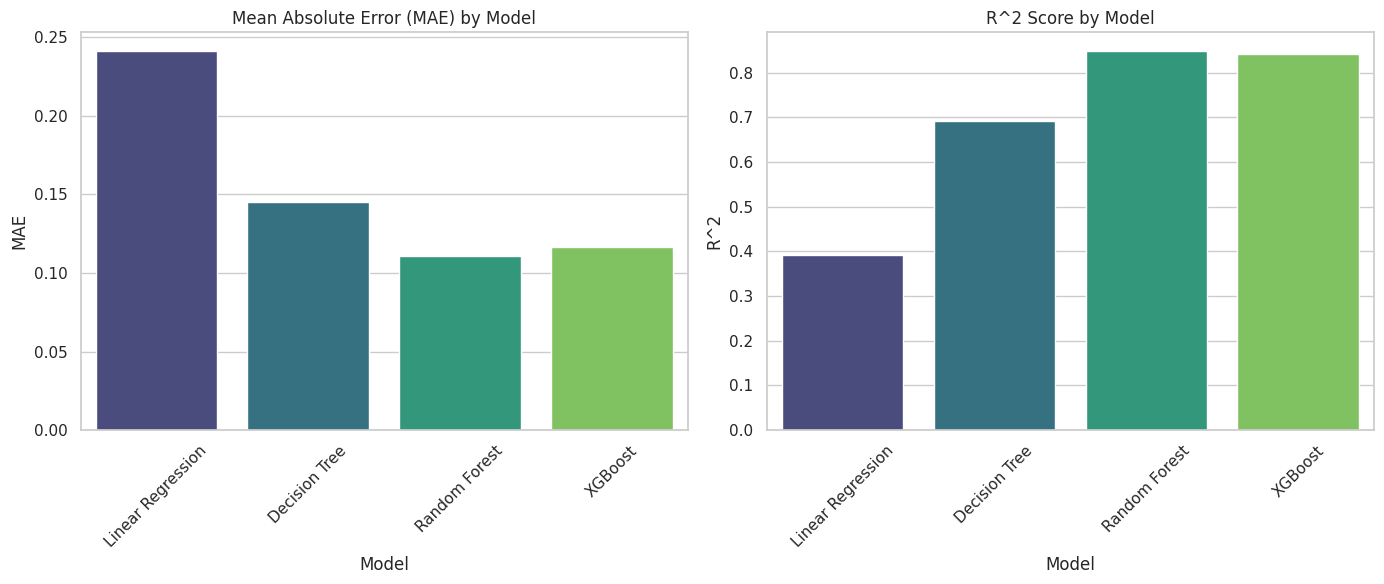

In [ ]:
# Data preparation
results_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [0.240946, 0.144929, 0.110448, 0.116721],
    'R^2': [0.392978, 0.690714, 0.847877, 0.842305]
}

results_df = pd.DataFrame(results_data)

# Plotting MAE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) by Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# Plotting R^2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R^2', data=results_df, palette='viridis')
plt.title('R^2 Score by Model')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

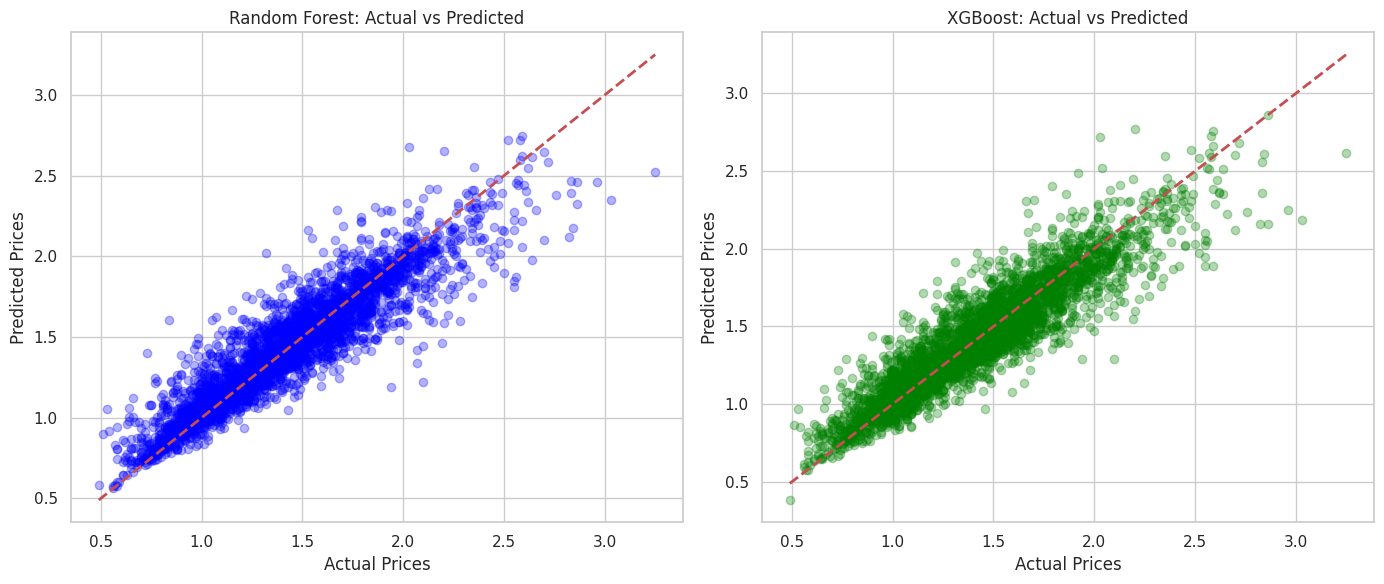

In [ ]:
# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_xgb = xgboost_reg.predict(X_test)

# Plot the actual vs predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

## Analysis of Prediction Graph
- The scatter plot above shows a strong correlation between the actual and predicted prices for avocados using the Random Forest model. The following observations can be made:

1. **Alignment with the Diagonal:** Most points are clustered around the 45-degree line (the red dashed line), which indicates that the model's predictions are close to the actual values. Perfect predictions would lie exactly on this line.

2. **Spread of Points:** The points are closely packed around the line for a significant range of prices, indicating consistent predictive performance across different price levels.

3. **Deviations at Higher Prices:** There are slightly more deviations from the diagonal at higher price points. This could indicate that the model has some difficulty in capturing the variability in higher prices, which may be due to the lower frequency of higher-priced data points in the training set.

---

## Conclusion

The Random Forest model demonstrates robust performance in predicting the prices of avocados, as evidenced by the proximity of the predicted values to the actual values. Further refinements, such as hyperparameter tuning and inclusion of additional relevant features, could potentially enhance the model's performance, especially at the higher price ranges.

## References
- Kaggle - [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- Kaggle - [Avocado Price Regression](https://www.kaggle.com/code/caesarmario/avocado-price-regression-w-pycaret-eda#4.-%7C-Reading-Dataset-%F0%9F%91%93)

----

- Search - [Why do Avocados get so expensive in Late August?](https://bevspot.com/blog/why-do-avocados-get-so-expensive-in-late-august/)

- W3Schools - [Matplotlib ](https://www.w3schools.com/python/matplotlib_subplot.asp)
- Seabonr - [Gallery](https://seaborn.pydata.org/examples/index.html)